### Evalución del Primer Tema

Carlos Alejandro Gutiérrez Sandoval

In [1]:
from numpy import random as rdm
import numpy as np
from functools import reduce
from matplotlib import pyplot as plt
from copy import copy

Un juego de lanzamiento de una moneda: Eres el afortunado ganador de un concurso de sorteos. Su
premio es unas vacaciones con todos los gastos pagados en un hotel importante en Las Vegas, incluyendo
algunas fichas para apostar en el casino del hotel. Al ingresar al casino, descubres que, adem´as de los
juegos habituales (blackjack, ruleta, etc.), ofrecen un nuevo juego interesante con las siguientes reglas.
Reglas del juego.
1. Cada jugada del juego consiste en lanzar repetidamente una moneda imparcial hasta que la diferencia
entre el n´umero de caras lanzadas y el número de sellos es 3.
2. Si decides jugar el juego, debes pagar \$1 por cada lanzamiento de la moneda. No puedes salir
durante una jugada del juego.
3. Usted recibe \$8 al final de cada uno de los juego. Por lo tanto, ganas dinero si el número de
lanzamientos requeridos es menor a 8, pero pierdes dinero si se requieren más de 8 lanzamientos. Con el
juego planteado anteriormente, responda las siguientes preguntas:
a) ¿Cuál es el promedio de tiradas hasta que termina un juego? ¿Cu´al es su desviación estándar? (dibuja
su histograma).
b) para el inciso anterior ¿Cuál es la probabilidad de que tires más de 10 veces para terminar un juego?
¿ y de que tires menos de 5 veces?.
c) Imagina que lanzas 100 tiros exactos la moneda. ¿Cuál es tu valor esperado de \$\$ ganado/perdido?
**¿Y tu valor más probable?**¿Cuál es la probabilidad de ganar dinero? (Grafica el histograma de
simulaciones).
d) Imagina que comienzas con \$ 30 ¿Cuál es el valor esperado del número de tiradas que debes realizar
antes de quedarte sin dinero? ¿Cuál es la probabilidad de realizar más de 150 tiradas? (grafica el
histograma correspondiente).

In [2]:
class game:              
    def __init__(self):
        self.restart()
        
    def play(self,**kwargs):                  
        while abs(self.diff) != 3:
            self.nextround()
        self.cashIn()          
        #print('Juego Completo.')
        return self.stats()
    
    def nextround(self):
        self.p_l -= 1
        self.rounds += 1
        self.diff +=self.headOrTails()
        
        
    def headOrTails(self):
        return 1 if rdm.uniform(0,1)<.5 else -1
    
    def results(self):
        print('Resultados:\n')
        print(self.stats())
        return self
        
    def restart(self):        
        self.diff = 0
        self.payout = 8
        self.cost = 1
        self.rounds = 0
        self.p_l = 0
        return self         
    
    def stats(self):
#         return {'Ganancia':self.p_l,'Rounds':self.rounds}
        return [self.p_l,self.rounds]
        
    def nRounds(self,rounds):
        while(self.rounds < rounds):
            self.nextround()
            self.cashIn()                
        return self
    
    def outofmoney(self,money):
        self.p_l += money
        while(self.p_l > 0):
            self.nextround()
            self.cashIn()
        return self.stats()
            
    def cashIn(self):
        if(abs(self.diff) == 3):
                self.p_l+=self.payout
                self.diff=0      

In [3]:
juegos = 1000
newgame = game()
resultados = [newgame.restart().play() for i in range(juegos)]
# rounds
ganancias,rounds = zip(*resultados)

a) ¿Cuál es el promedio de tiradas hasta que termina un juego? ¿Cuál es su desviación estándar? (dibuja su histograma).

In [4]:
print('Media:\n',np.mean(rounds))
# print('Mediana de rounds: \n',reduce(lambda x,y:x + y[1],resultados,0)/juegos)

Media:
 9.156


In [5]:
print('Desv.:\n',np.std(rounds))

Desv.:
 7.430724325393858


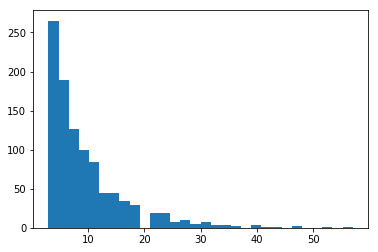

In [6]:
plt.hist(rounds,bins=30)
plt.show()

 b) para el inciso anterior ¿Cuál es la probabilidad de que tires más de 10 veces para terminar un juego? ¿ y de que tires menos de 5 veces?.

In [7]:
print('Probabilidad de tirar más de 10 veces: \n',reduce(lambda x,y: x + 1 if y > 10 else x,rounds,0)/juegos)

Probabilidad de tirar más de 10 veces: 
 0.32


In [8]:
print('Probabilidad de tirar menos de 5 veces: \n',reduce(lambda x,y: x + 1 if y < 5 else x,rounds,0)/juegos)

Probabilidad de tirar menos de 5 veces: 
 0.265


c) Imagina que lanzas 100 tiros exactos la moneda. ¿Cuál es tu valor esperado de $$ ganado/perdido? **¿Y tu valor más probable?**¿Cuál es la probabilidad de ganar dinero? (Grafica el histograma de simulaciones). 

Esperado:
 -12.528
Valor más probable -4; Counts 170


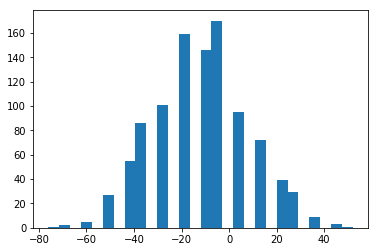

Probabilidad de ganar dinero: 
 0.248


In [9]:
rondas,juegos = 100,1000
pl = [newgame.restart().nRounds(rondas).stats()[0] for i in range(juegos)]
from scipy.stats import mode
print('Esperado:\n',np.mean(pl))
moda,count = mode(pl)
print('Valor más probable {}; Counts {}'.format(moda[0],count[0]))
plt.hist(pl,bins=28)
plt.show()
print('Probabilidad de ganar dinero: \n',
      reduce(lambda x,y: x + 1 if y > 0 else x,pl,0)/juegos)

d) Imagina que comienzas con $ 30 ¿Cuál es el valor esperado del número de tiradas que debes realizar antes de quedarte sin dinero? ¿Cuál es la probabilidad de realizar más de 150 tiradas? (grafica el histograma correspondiente).

In [10]:
juegos = 1000
newgame = game()
tiros = [newgame.restart().outofmoney(30)[1] for i in range(juegos)]
# rounds
# ganancias,rounds = zip(*resultados)

print('Probabilidad de realizar más de 150 tiradas: \n',
      reduce(lambda x,y: x + 1 if y > 150 else x,tiros,0)/juegos)

Probabilidad de realizar más de 150 tiradas: 
 0.55


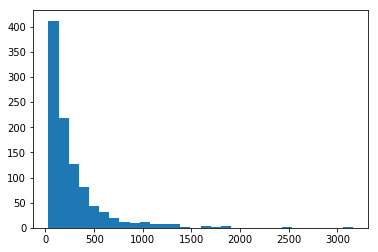

In [11]:
plt.hist(tiros,bins=30)
plt.show()

Jessica Williams, gerente de Kitchen Appliances para Midtown Department Store, siente que sus niveles
de inventario de estufas han estado funcionando m´as de lo necesario. Antes de revisar la pol´ıtica de
inventario de estufas, registra el n´umero vendido cada d´ıa durante un per´ıodo de 25 d´ıas, como se resume
a continuaci´on.
Cuadro 1: Tabla de ventas vs n´umero de d´ıas

|Maquinas vendidas| 2| 3| 4| 5| 6|
| :-----:|| -----:|| -----:|| -----:|| -----:|| -----:|
|Número de días| 4| 7| 8| 5| 1|
Graficar el histograma y calcular el promedio de ventas usando python y la f´ormula te´orica de valor
esperado.

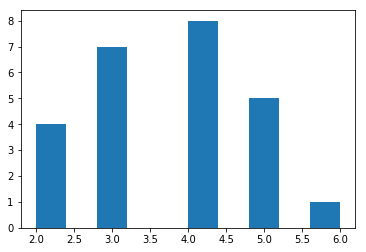

E[x]:
 3.68


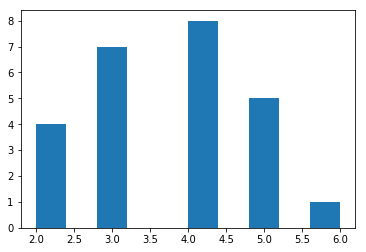

E[x]:
 3.68


In [12]:
ventas=[2,3,4,5,6]
dias=[4,7,8,5,1]

'''Primera forma'''
plt.hist(ventas,weights=dias)
plt.show()
print('E[x]:\n',reduce(lambda x,y:x+y,map(lambda x,y: x*y, ventas,dias))/sum(dias))

'''Segunda forma'''
a = map(lambda x,y:[x]*y,ventas,dias)
flattened = [j for i in a for j in i]
plt.hist(flattened)
plt.show()
print('E[x]:\n',sum(flattened)/len(flattened))

3. Rustbelt Manufacturing Company emplea un equipo de mantenimiento para reparar sus máquinas según sea necesario. La gerencia ahora quiere un estudio de simulación para analizar cuál debe ser el tamaño de la tripulación, donde los tamaños de la cuadrilla considerados son 2, 3 y 4. El tiempo requerido por la cuadrilla para reparar una máquina tiene una distribución uniforme durante el intervalo de 0 a dos veces la media, donde la media depende del tamaño de la cuadrilla. La media es de 4 horas con dos miembros de la cuadrilla, 3 horas con tres miembros de la cuadrilla y 2 horas con cuatro miembros de la cuadrilla.

    El tiempo entre las interrupciones de alguna máquina tiene una distribución uniforme de entre 3.5 y 9 horas. Cuando una máquina se descompone y por lo tanto requiere reparación, la gerencia desea realizar los siguientes análisis:

    **Nota: Se quiere analizar el tiempo de espera de una máquina descompuesta, por lo tanto se tienen que analizar los tiempos de reparación y los tiempos de descomposición y ver si cuando se daña una nueva máquina todavía están reparando una máquina anterior o ya la repararon.**
    
    a) Comienza con una cuadrilla de tamaño 2, ¿Cuál es el tiempo medio de espera para reparar la máquina? ¿Cuál es la probabilidad de que una máquina tenga que esperar más de 8 horas para ser reparada? (dibuja el histograma correspondiente).
    
    b) Repita el inciso a) pero para una cuadrilla de tamaño 3, ¿Cuál es el tiempo medio de espera para reparar la máquina? ¿Cuál es la probabilidad de que una máquina tenga que esperar más de 3 horas para ser reparada? (dibuja el histograma correspondiente).
    c) Repita el inciso b) para una cuadrilla de tamaño 4.

In [13]:
class repair:    
    medias = {2:4,3:3,4:2}    
    def __init__(self,cuadrilla):
        assert(cuadrilla in [2,3,4])
        self.cuadrilla = cuadrilla
        self.media = self.medias[cuadrilla]                
        self.breakTime = lambda: rdm.uniform(3.5,9)
        self.repair = lambda: rdm.uniform(0,self.media*2)
    
    def sim(self,it):
        rango = range(it)
        Z2 = [self.repair() for i in rango]
        Z1 = [self.breakTime() for i in rango]
        Dt = copy(Z2)
        for i in range(1,it):
            famma = Dt[i-1]-Z1[i-1] if Dt[i-1]-Z1[i-1]>0 else 0    
            Dt[i]+=famma
        return list(map(lambda x,y:x-y if x-y>0 else 0,Dt,Z1))
    

E[x]:
 [0.5995602999403928, 0.6052613742264904, 0.6003785985257949, 0.598106892510281, 0.6011963242996046, 0.605771175575735, 0.60124028955646, 0.5952531883457548, 0.5935107900990377, 0.609612021453534]
Probabilidad de esperar más de 8 horas: 
 0.00258


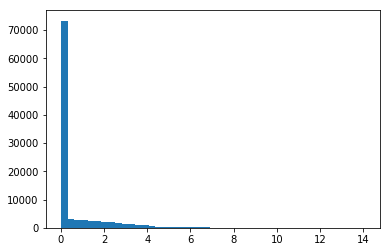

In [14]:
cuadrilla = repair(2)
sims = 100000
espera = cuadrilla.sim(sims)
print('E[x]:\n',[np.mean(cuadrilla.sim(sims)) for i in range(10)])
print('Probabilidad de esperar más de 8 horas: \n',reduce(lambda x,y: x + 1 if y > 8 else x,espera,0)/sims)
plt.hist(espera,bins=45)
plt.show()

E[x]:
 [0.0923218824138966, 0.09366437994246178, 0.09483940443437214, 0.09474570264417052, 0.0929508240105034, 0.09018165460177656, 0.09216131715909527, 0.09562467104107376, 0.09319488722372068, 0.09414740860474562]
Probabilidad de esperar más de 3 horas: 
 0.00083


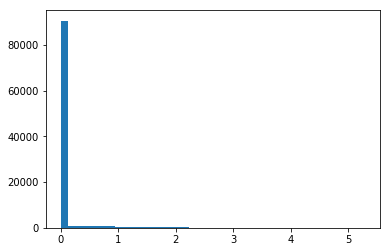

In [15]:
cuadrilla = repair(3)
sims = 100000
espera = cuadrilla.sim(sims)
print('E[x]:\n',[np.mean(cuadrilla.sim(sims)) for i in range(10)])
print('Probabilidad de esperar más de 3 horas: \n',reduce(lambda x,y: x + 1 if y > 3 else x,espera,0)/sims)
plt.hist(espera,bins=45)
plt.show()

E[x]:
 [0.0010236815988385532, 0.0009232261110947327, 0.0009454414023532444, 0.0010128579673924928, 0.0007889545588521024, 0.0009109200380064661, 0.0008980679306559193, 0.0009222128248592246, 0.0009332591861343708, 0.0009532814400878078]
Probabilidad de esperar más de 3 horas: 
 0.0


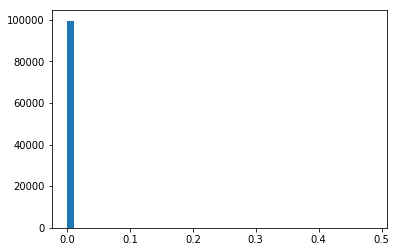

In [16]:
cuadrilla = repair(4)
sims = 100000
espera = cuadrilla.sim(sims)
print('E[x]:\n',[np.mean(cuadrilla.sim(sims)) for i in range(10)])
print('Probabilidad de esperar más de 3 horas: \n',reduce(lambda x,y: x + 1 if y > 3 else x,espera,0)/sims)
plt.hist(espera,bins=45)
plt.show()

4. El juego de dados requiere que el jugador arroje dos dados una o más veces hasta que se llegue a una
decisión sobre si él (o ella) gana o pierde. El gana si la primera tirada resulta en una suma de 7 u 11 ó, alternativamente, si la primera suma es 4, 5, 6, 8, 9 o 10 y la misma suma reaparece antes de que
aparezca una suma de 7. Por el contrario, pierde si la primera tirada resulta en una suma de 2, 3 o 12 o,
alternativamente, si la primera suma es 4, 5, 6, 8, 9 o 10 y aparece una suma de 7 antes de la primera
suma reaparece.
a) calcule la probabilidad de ganar corriendo 10,000 simulaciones.


In [17]:
class craps:
    
    def __init__(self):
        self.roll = lambda :rdm.randint(1,7)
    
    def play(self):         
        return self.win(None,self.throw())
        
    def win(self,prior,dice):
#         print(prior,dice)
        if not prior:
            if dice in [7,11]:
                return True
            if dice in [2,3,12]:
                return False
            return self.win(dice,self.throw())
        else:
            if dice == 7:
                return False
            if prior == dice:
                return True
            return self.win(prior,self.throw())
        
    def throw(self):
        return self.roll() + self.roll()
    
    def playN(self,balance,bet,iters):        
        return reduce(lambda x,y: x+bet if self.play() else x-bet,range(iters),balance)
        

In [18]:
dados = craps()

In [19]:
it = 10000
print('Probabilidad de ganar en {} juegos\n'.format(it),np.sum([dados.play() for i in range(it)])/it)

Probabilidad de ganar en 10000 juegos
 0.4912


b) Imagina que cada juego ganas o pierdes \$50. Si inicias con $500. **¿Cuál es tu valor esperado de dinero
después de 10 juegos? ¿y el más probable? ¿Cuál es la probabilidad de ganar dinero?.**

In [87]:
it1 = 10
sims1=10000
print('Balance después de {} juegos: ${}\n'.format(it1,dados.playN(500,50,it1)))

Balance después de 10 juegos: $600



In [88]:
juegos = list(map(lambda x:dados.playN(500,50,it1),range(sims1)))

In [89]:
print('E[x],x:balance de juego a diez pasos. {}'
      .format(np.mean(juegos)))

E[x],x:balance de juego a diez pasos. 493.72


In [93]:
res = reduce(lambda x,y:x+1 if y>500 else x,juegos,0)/sims1
print('Probabilidad de ganar {}.'.format(res))

Probabilidad de ganar 0.3651.


5. Una inversión en cetes actualmente promete un rendimiento que va entre el 8 % y el 12 % anual.

a) Considera la cantidad total de dinero que obtendrás al final del año dado una inversión inicial de
\$300000. Realiza un programa que simule 10,000 escenarios diferentes que puedan suceder, calcula
su media, su desviación estándar y grafica su histograma.

E[x]:329975.81699504954
Desv[x]:3467.837559913035


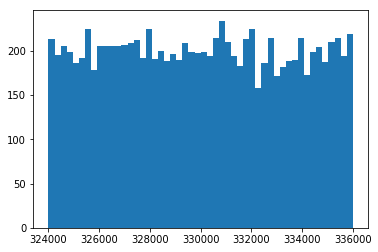

In [22]:
inicial = 300000
its = 10000
sims = [inicial*(1+(.12-.08)*rdm.rand()+.08) for i in range(its)]
print('E[x]:{}'.format(np.mean(sims)))
print('Desv[x]:{}'.format(np.std(sims)))
plt.hist(sims,bins=50)
plt.show()

b) Ahora supón que dejas el dinero durante 6 años, Realiza un programa que simule 10,000 escenarios
diferentes que puedan suceder, calcula su media, su desviación estándar y grafica su histograma.

E[x]:531420.766115228
Desv[x]:13832.51531712988


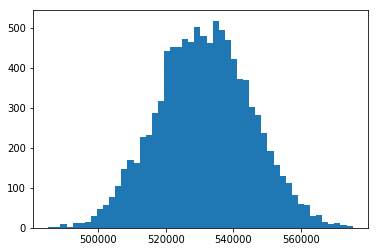

In [23]:
mult = lambda:reduce(lambda x,y:x*(1+(.12-.08)*y+.08),rdm.rand(6),1)    
sims = [inicial*mult() for i in range(its)]
print('E[x]:{}'.format(np.mean(sims)))
print('Desv[x]:{}'.format(np.std(sims)))
plt.hist(sims,bins=50)
plt.show()

¿Cuál es la probabilidad de ganar más de \$**58000**? ¿Cuál es la probabilidad de ganar menos de
\$ 55000?.


In [24]:
print('Probabilidad de ganar más de 580000: {}\n'.format(reduce(lambda x,y: x+1 if y>580000 else x,sims,0)/its))

Probabilidad de ganar más de 580000: 0.0



In [25]:
print('Probabilidad de ganar menos de 550000: {}\n'.format(reduce(lambda x,y: x+1 if y<550000 else x,sims,0)/its))

Probabilidad de ganar menos de 550000: 0.9096



c) Repite el inciso b), pero suponiendo que el rendimiento es discreto, es decir, solo puede tomar los valores enteros 8,9,10,11,12. ¿Cuál es la probabilidad de ganar entre \$53000 y \$56000?

E[x]:517315.9005318309
Desv[x]:12975.276827089741


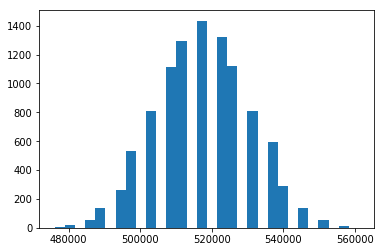

In [26]:
mult = lambda:reduce(lambda x,y:x*(1+y/100),rdm.randint(8,12,6),1)    
sims = [inicial*mult() for i in range(its)]
print('E[x]:{}'.format(np.mean(sims)))
print('Desv[x]:{}'.format(np.std(sims)))
plt.hist(sims,bins=30)
plt.show()

In [27]:
print('Probabilidad de ganar más de 560000: {}\n'.format(reduce(lambda x,y: x+1 if y>560000 else x,sims,0)/its))

Probabilidad de ganar más de 560000: 0.0001



In [28]:
print('Probabilidad de ganar menos de 530000: {}\n'.format(reduce(lambda x,y: x+1 if y<530000 else x,sims,0)/its))

Probabilidad de ganar menos de 530000: 0.81

